In [20]:
from osgeo import gdal
import pathlib
import matplotlib.pyplot as plt
import numpy as np

In [21]:
# define path to data dir
feature_dir   = pathlib.Path('/media/Data/FYS_3023/Sentinel-1').absolute()

# select S1 product
S1_base = 'S1A_EW_GRDM_1SDH_20240808T064809_20240808T064913_055118_06B761_66C0'

In [22]:
# build path to intensity imaage files
HH_path    = feature_dir / S1_base / 'Sigma0_HH_db.img'
HV_path    = feature_dir / S1_base / 'Sigma0_HV_db.img'

In [23]:
# read intensities
HH = gdal.Open(HH_path.as_posix()).ReadAsArray()
HV = gdal.Open(HV_path.as_posix()).ReadAsArray()

In [24]:
# create 8-bit false_color RGB

# min/max values for sclaing of HH and HV
vmin_HH = -30
vmax_HH = -5
vmin_HV = -35
vmax_HV = -10

# new 8-bit min/max values
new_min = 0
new_max = 255

# linear map from sigma0 in dB to new_min and new_max
HH_scaled = (HH - (vmin_HH)) * ((new_max - new_min) / ((vmax_HH) - (vmin_HH))) + new_min
HV_scaled = (HV - (vmin_HV)) * ((new_max - new_min) / ((vmax_HV) - (vmin_HV))) + new_min

# clip values
HH_scaled = np.clip(HH_scaled, new_min, new_max)
HV_scaled = np.clip(HV_scaled, new_min, new_max)

# stack scaled channels to fals-color RGB
RGB = np.stack((HV_scaled,HH_scaled,HH_scaled),2)

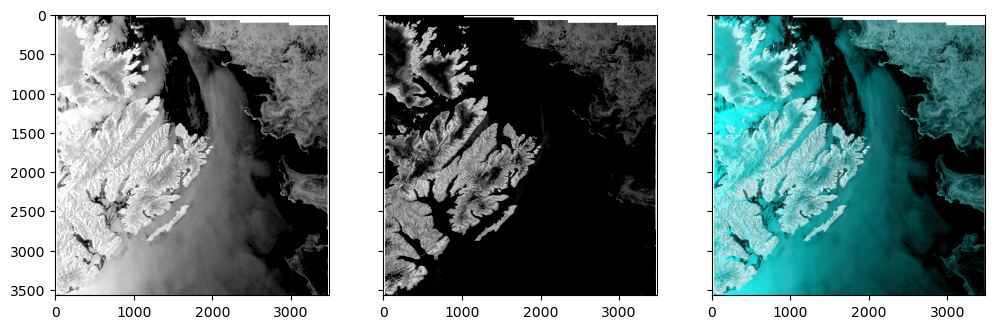

In [26]:
step = 3
fig, axes = plt.subplots(1,3,sharex=True, sharey=True, figsize=((12,5)))
axes = axes.ravel()
axes[0].imshow(HH[::step,::step], cmap='gray', vmin=vmin_HH, vmax=vmax_HH)
axes[1].imshow(HV[::step,::step], cmap='gray', vmin=vmin_HV, vmax=vmax_HV)
axes[2].imshow(RGB[::step,::step,:]/255)

# 